## Trabajando con dataframes de Pandas
Teniendo estos dos dataframes:

```
fecha	value
0	2023-02-10	12
1	2023-02-11	22
2	2023-02-12	17
3	2023-02-13	16
4	2023-02-14	20
```
Y
```
i	value
0	1	25
1	2	32
2	3	19
3	4	17
4	5	21
```
¿Cómo conseguir unirlos en uno solo con extensión de la fecha?

In [ ]:
import pandas as pd
# Creo el primer dataframe
data1 = {'i':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
        'predictions': [23449.47550067, 23559.32569924, 23583.05264057, 23681.14684201, 23703.81418165,
                  23791.91026551, 23813.93949413, 23893.52549596, 23915.23656027, 23987.57307283, 
                  24009.20535807, 24075.36113636, 24097.09041565, 24157.97229296, 24179.92438818,
                  24236.30242754, 24258.56419206, 24311.0928452,  24333.72096859, 24382.95688783,
                  24405.98493194, 24452.40197437, 24475.84597558, 24519.84785077, 24543.71076201, 
                  24585.64170079, 24609.91689652, 24650.07065691, 24674.74468322, 24713.37215817]}

df1 = pd.DataFrame.from_dict(data1)
df1.head(3)

# Creamos otro dataframe basado en fechas:
# Creo el segundo dataframe
data2 = {'fecha': ['2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14'],
        'value': [12, 22, 17, 16, 20]}

df2 = pd.DataFrame.from_dict(data2)
df2["fecha"] = pd.to_datetime(df2["fecha"]) # string to datetime
df2
# Intento unirlos, pero no lo hace como quiero
df3 = pd.concat([df, df2], axis=0)
df3
# Convierto la columna i en un índice de tiempo que comienza justo a fecha de hoy e incrementa 1 día en cada salto
# 1676332800 => Timestamp de hoy a las 00:00 en https://www.unixtimestamp.com/
df1.index = pd.DatetimeIndex((df1["i"] * 86400 + 1617205440) * 10**9)
df1 = df1.drop("i", axis=1)
df1
# Unimos df extienda a d2 con las fecha
# df2 ya tiene índice de fecha y llega hasta el día 14
df2.index = pd.DatetimeIndex(df2["fecha"])
df2 = df2.drop("fecha", axis=1)
df2
# Ahora puedo unirlos de forma que los datos ocupen las columnas o índices correspondientes
df3 = pd.concat([df1, df2], axis=0)
df3
# Re-ordeno el índice, para que quede incremental en el tiempo
df3 = df3.sort_index()
df3
# import matplotlib.pyplot as plt
df3.plot()


# Agrupar por fecha

In [1]:
import pandas as pd

# Creamos el dataframe
df = pd.DataFrame({
    'fecha': ['2023-01-01 00:10:15', '2023-01-03 11:11:03', '2023-01-06 00:23:44',
              '2023-01-07 13:10:25', '2023-01-07 13:12:35', '2023-01-09 00:10:15'],
    'valor': [100, 200, 400, 600, 150, 170]
})

# Convertimos la columna de fecha a un objeto datetime de pandas
df['fecha'] = pd.to_datetime(df['fecha'])
df

,fecha,valor
0,2023-01-01 00:10:15,100
1,2023-01-03 11:11:03,200
2,2023-01-06 00:23:44,400
3,2023-01-07 13:10:25,600
4,2023-01-07 13:12:35,150
5,2023-01-09 00:10:15,170


In [2]:
df.dtypes

fecha    datetime64[ns]
valor             int64
dtype: object

In [3]:
# Agrupamos los datos por día y sumamos los valores de cada grupo
subtotales = df.groupby(df['fecha'].dt.date)['valor'].sum()
subtotales

fecha
2023-01-01    100
2023-01-03    200
2023-01-06    400
2023-01-07    750
2023-01-09    170
Name: valor, dtype: int64

### ¿Cómo generar un df con los subtotales por fecha y que las fechas intermedias con subtotales nulos aparezcan en el dataframe con valor 0?
- Crear un rango de fechas que incluya todas las fechas en el DataFrame original.
- Fusionar el DataFrame original con el rango de fechas utilizando un left join para mantener todas las fechas del rango.
- Agrupar los datos por fecha y calcular los subtotales.
- Llenar los valores nulos de los subtotales con 0.

In [4]:
# Reducimos la fechahora a sólo fecha
df['fecha'] = df['fecha'].dt.date
df

,fecha,valor
0,2023-01-01,100
1,2023-01-03,200
2,2023-01-06,400
3,2023-01-07,600
4,2023-01-07,150
5,2023-01-09,170


In [5]:
df.dtypes

fecha    object
valor     int64
dtype: object

In [6]:
# Convertimos de nuevo la columna de fecha a un objeto datetime de pandas
df['fecha'] = pd.to_datetime(df['fecha'])

In [7]:
df.dtypes

fecha    datetime64[ns]
valor             int64
dtype: object

In [8]:
# Creamos un rango de fechas que incluya todas las fechas en el DataFrame original
fechas = pd.date_range(start=df['fecha'].min(), end=df['fecha'].max())
fechas

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09'],
              dtype='datetime64[ns]', freq='D')

In [9]:
# Creamos un DataFrame con las fechas del rango
df_fechas = pd.DataFrame({'fecha': fechas})
df_fechas

,fecha
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
5,2023-01-06
6,2023-01-07
7,2023-01-08
8,2023-01-09


In [10]:
df_fechas.dtypes

fecha    datetime64[ns]
dtype: object

In [11]:
df.dtypes

fecha    datetime64[ns]
valor             int64
dtype: object

In [12]:
# Fusionamos el DataFrame original con el rango de fechas utilizando un left join
df_merged = pd.merge(df_fechas, df, on='fecha', how='left')
df_merged

,fecha,valor
0,2023-01-01,100.0
1,2023-01-02,NaN
2,2023-01-03,200.0
3,2023-01-04,NaN
4,2023-01-05,NaN
5,2023-01-06,400.0
6,2023-01-07,600.0
7,2023-01-07,150.0
8,2023-01-08,NaN
9,2023-01-09,170.0


In [20]:
# Agrupamos los datos por fecha y calculamos los subtotales
subtotales = df_merged.groupby('fecha')['valor'].sum()
# Llenamos los valores nulos de los subtotales con 0
subtotales = subtotales.fillna(0)
# Creamos un DataFrame con los subtotales por fecha
df_subtotales = pd.DataFrame({'fecha': subtotales.index, 'subtotales': subtotales.values})
# Imprimimos el DataFrame con los subtotales por fecha y las fechas intermedias con subtotales nulos
df_subtotales

<bound method DataFrame.sort_values of        fecha  subtotales
0 2023-01-01       100.0
1 2023-01-02         0.0
2 2023-01-03       200.0
3 2023-01-04         0.0
4 2023-01-05         0.0
5 2023-01-06       400.0
6 2023-01-07       750.0
7 2023-01-08         0.0
8 2023-01-09       170.0>

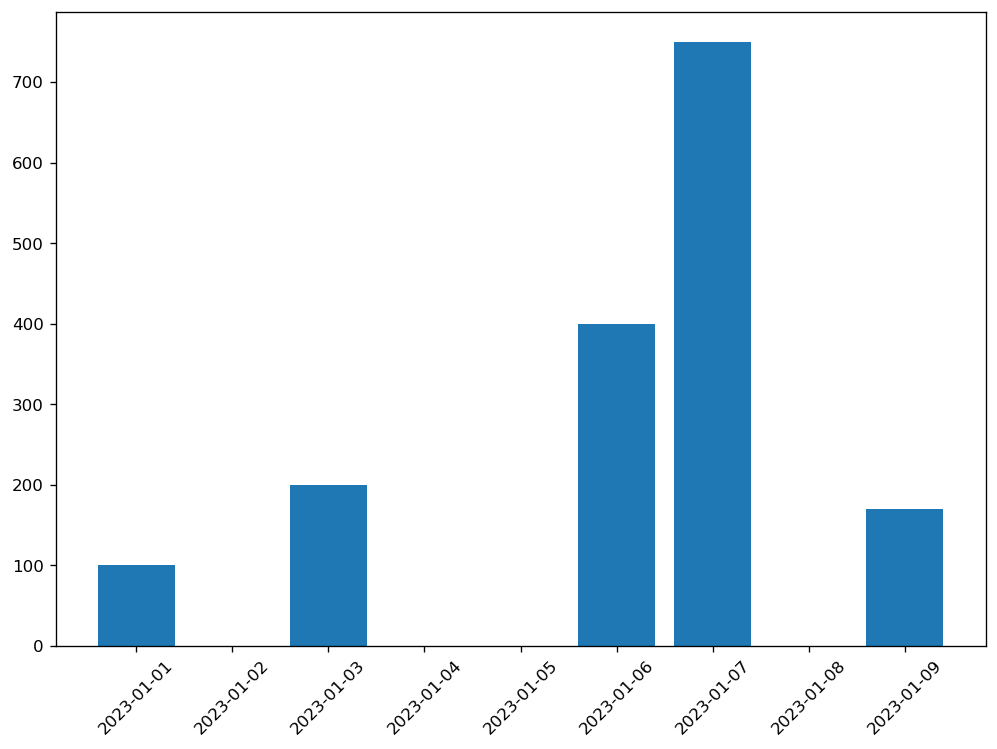

In [21]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
plt.bar(df_subtotales["fecha"], df_subtotales["subtotales"])
plt.xticks(rotation=45)
plt.show()